# IMPORTAMOS LOS DATOS Y LOS VISUALIZAMOS/ANALIZAMOS

In [1]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt
datos = pd.read_csv("diabetes.csv")

In [2]:
datos.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
datos.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


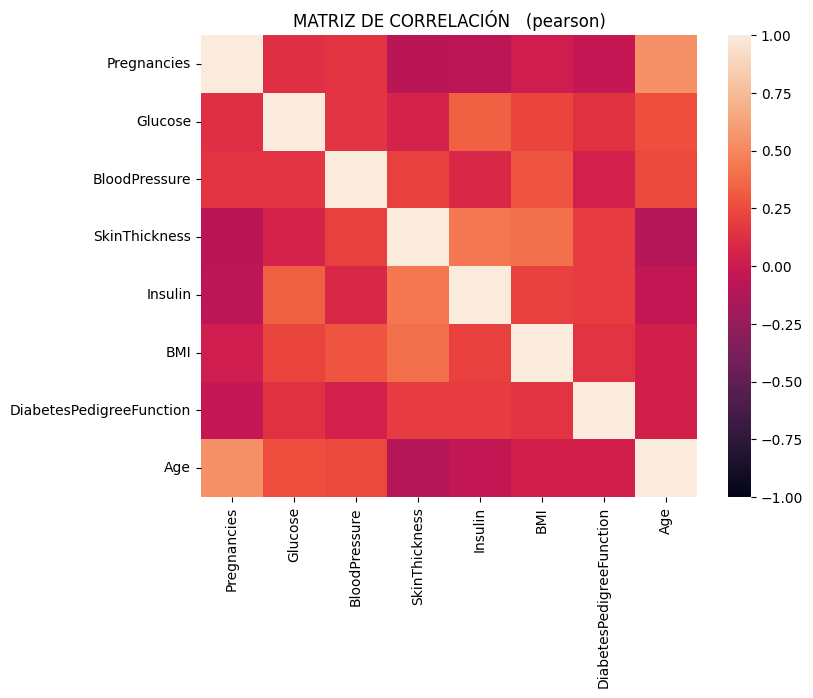

In [4]:
#Analizamos a los predictores en busca de correlaciones
from sklearn.preprocessing import StandardScaler
X = datos.drop(columns= "Outcome", axis = 1)

X = pd.DataFrame(data = StandardScaler().fit_transform(X), columns = X.columns)
Y = datos.Outcome
import seaborn as sns
plt.figure(figsize=(8,6))
plt.title("MATRIZ DE CORRELACIÓN   (pearson)")
sns.heatmap(X.corr(), vmin=-1, vmax=1)
plt.show()

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

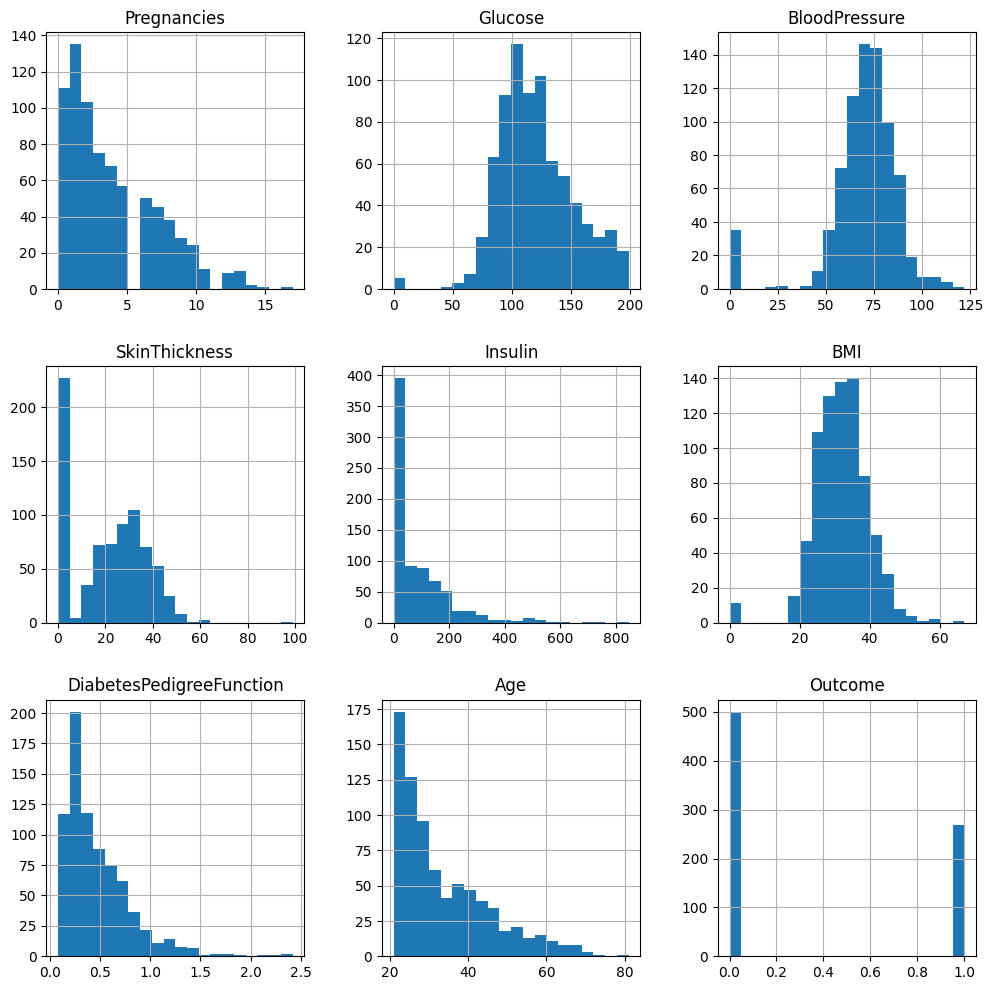

In [5]:
datos.hist(bins = 20, figsize=(12,12))

In [6]:
X.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


# REGRESIÓN LOGÍSTICA

## USANDO UNA REGRESIÓN LOGÓSTICA PARA ANALIZAR RELACIONES ESTADÍSTICAS ENTRE PREDICTORES Y LA VARIABLE DE RESPUESTA (usando la API statsmodels)



Únicamente para realizar el análisis estadístico de las relaciones entre predictores y variable de respuesta, realizaremos una regresión logística multiple en ***todo el conjunto de datos***; luego en el modelo final, como es de esperarse, utilizaremos validación cruzada.


Cita: *https://stats.stackexchange.com/questions/569541/is-cross-validation-necessary-when-computing-significance-of-coefficients#:~:text=Takeaway%3A%20If%20you%20are%20trying,a%20good%20variable%20to%20use.*

In [7]:
#Realizarémos una regresión logística multiple para analizar, estadísticamente las relaciones predictores-response
import statsmodels.api as sm

X = sm.add_constant(X)
Mlogit = sm.MNLogit(Y,X)
res_estadisticos = Mlogit.fit()
print(res_estadisticos.summary())


Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                Outcome   No. Observations:                  768
Model:                        MNLogit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.2718
Time:                        12:56:10   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
               Outcome=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8711      0.097     -8.986      0.000      -1.061

De los p-valores obtenidos previamente concluimos que existe evidencia estadística encontra de una relación estadística entre la variable de respuesta, ***Outcome*** y las variables predictoras ***BloodPressure***,  ***SkinThickness*** , ***Age*** y ***Insulin***

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression; log_reg = LogisticRegression()

X_logreg = datos.drop(columns = ["BloodPressure", "SkinThickness", "Outcome","Age","Insulin"], axis = 1)
X_logreg = StandardScaler().fit_transform(X_logreg)
Y = datos.Outcome
cross_val_score(log_reg, X_logreg, Y).mean()


0.7695611577964518